In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

df = pd.read_csv('/content/drive/MyDrive/leetcode_data.csv')
print("데이터 수:", len(df)) # 총 인원 수

df['ani_group'] = df['ani_num'].apply(lambda x: 'anime' if x >= 1 else 'non-anime') # ani_num이 1보다 크면 애니프사
df['ani_type'] = df['ani_num'].apply(lambda x: 'basic' if x == -1 else ('normal' if x == 0 else 'anime')) # -1이면 기본프사, 0이면 일반프사, 아니면 애니프사

df.head()

데이터 수: 119623


,rankings,contests,ani_num,ani_group,ani_type
0,1,26,0,non-anime,normal
1,2,51,0,non-anime,normal
2,3,84,0,non-anime,normal
3,4,107,3,anime,anime
4,5,146,0,non-anime,normal


Text(0, 0.5, 'Anime Ratio')

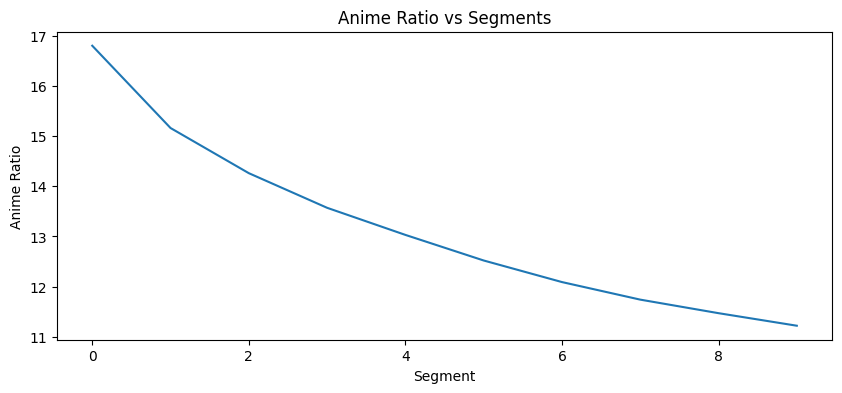

In [3]:
n = 10

ani_rate = []
for i in range(n):
  sliced_df = df.loc[0:(len(df)//n)*(i+1)]
  # print(f"{round((len(sliced_df.loc[sliced_df['ani_group'] == 'anime'])) / len(sliced_df) * 100,2)}%")
  ani_rate.append(round((len(sliced_df.loc[sliced_df['ani_group'] == 'anime'])) / len(sliced_df) * 100,2))


plt.figure(figsize=(10, 4))
plt.plot(range(len(ani_rate)), ani_rate)
plt.title('Anime Ratio vs Segments')
plt.xlabel('Segment')
plt.ylabel('Anime Ratio')

                rankings   contests
ani_group                          
anime      138439.709838  18.160944
non-anime  160395.836453  14.057554 



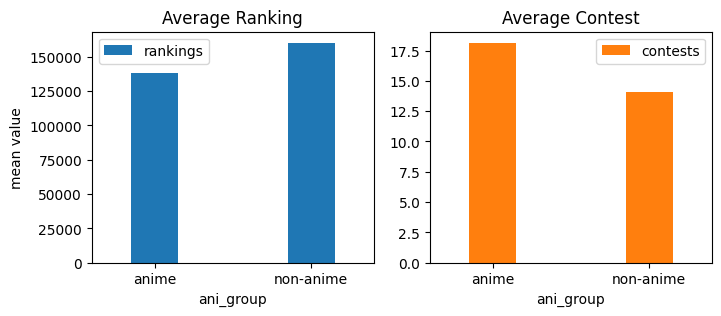

In [29]:
print(df.groupby('ani_group')[['rankings','contests']].mean(), '\n') # 애니프사 vs 기본프사 + 일반프사 랭킹, 대회 참여수 평균

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

# 랭킹 그래프
grouped_rank = df.groupby('ani_group')[['rankings']].mean()
grouped_rank.plot(kind='bar', ax=ax1, title='Average Ranking', width=0.3, color='C0')
ax1.set_ylabel('mean value')
ax1.tick_params(axis='x', rotation=0)

# 대회 참여수 그래프
grouped_cont = df.groupby('ani_group')[['contests']].mean()
grouped_cont.plot(kind='bar', ax=ax2, title='Average Contest', width=0.3, color='C1')
ax2.tick_params(axis='x', rotation=0)

plt.show()

<ipython-input-5-344959012>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = df.groupby(['segment', 'ani_group'])[['rankings', 'contests']].mean().unstack()


분할별 평균 비교:
                            rankings                  contests           
ani_group                     anime      non-anime      anime  non-anime
segment                                                                 
(0.999, 21864.2]       10001.526866   10927.946850  46.257214  42.082789
(21864.2, 44626.4]     32615.977104   33201.599845  27.778465  26.463851
(44626.4, 67213.6]     55577.095302   55958.106665  22.479866  20.479183
(67213.6, 109850.8]    84655.029028   85171.235261  16.805515  15.419690
(109850.8, 159213.0]  133051.018504  133439.995781  11.606785  10.705700
(159213.0, 217051.2]  188390.921141  188801.726555   7.614933   7.699907
(217051.2, 254963.4]  239853.331283  240079.824834   6.503515   6.005543
(254963.4, 269650.6]  262340.646320  262320.416574   5.512567   5.350111
(269650.6, 284862.8]  277105.336937  277303.476686   5.598198   4.854865
(284862.8, 300000.0]  292641.728281  292568.897344   5.027726   4.568422


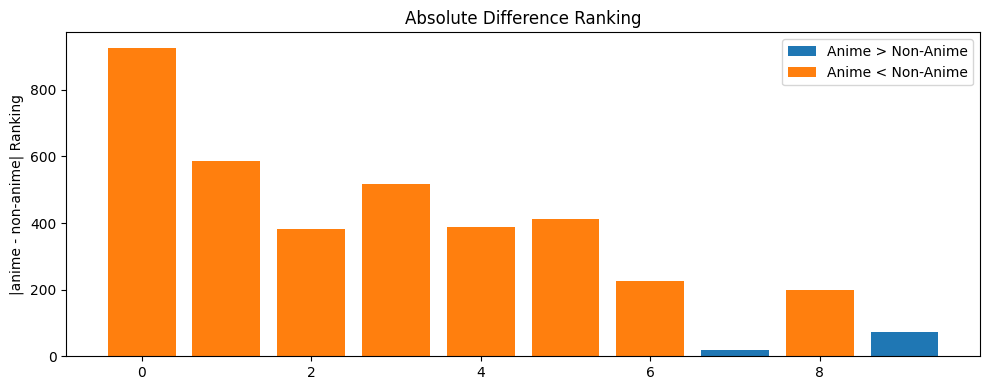

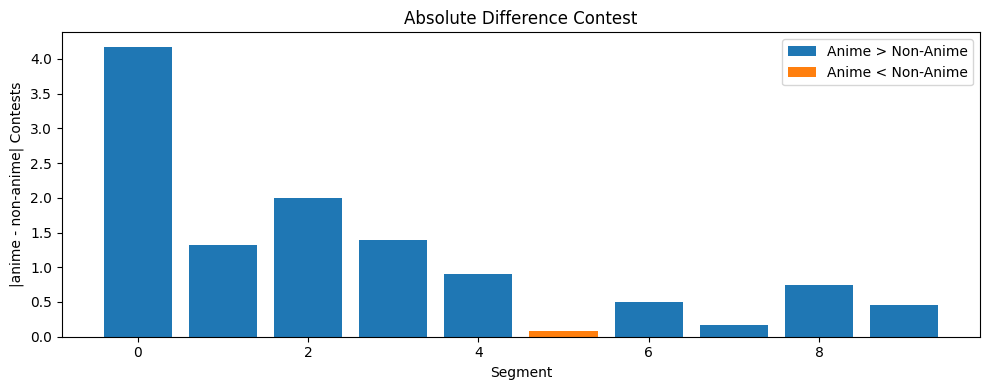

In [5]:
n = 10 # 전체 데이터를 n등분

df['segment'] = pd.qcut(df['rankings'], n)
means = df.groupby(['segment', 'ani_group'])[['rankings', 'contests']].mean().unstack()
print("분할별 평균 비교:\n", means)

legend = [Patch(facecolor='C0', label='Anime > Non-Anime'), Patch(facecolor='C1', label='Anime < Non-Anime')] # legend(범례) 설정

# 랭칭 차이 계산 및 색상 설정
# 애니프사가 기본+일반보다 크면 파랑, 아니면 주황
ranking_diff = abs(means['rankings']['anime'] - means['rankings']['non-anime'])
ranking_colors = ['C0' if means['rankings']['anime'].iloc[i] > means['rankings']['non-anime'].iloc[i] else 'C1' for i in range(len(ranking_diff))]

# Rankings 차이 막대 그래프
plt.figure(figsize=(10, 4))
plt.bar(range(len(ranking_diff)), ranking_diff, color=ranking_colors)
plt.title('Absolute Difference Ranking')
plt.ylabel('|anime - non-anime| Ranking')
if 80 < n < 300: # n값에 따른 x축 간격 설정
  plt.xticks(range(0, len(ranking_diff), 10), range(0, len(ranking_diff), 10))
plt.tight_layout()
plt.legend(handles=legend)
plt.show()

# 대회 참여 차이 계산 및 색상 설정
# 애니프사가 기본+일반보다 크면 파랑, 아니면 주황
contest_diff = abs(means['contests']['anime'] - means['contests']['non-anime'])
contest_colors = ['C0' if means['contests']['anime'].iloc[i] > means['contests']['non-anime'].iloc[i] else 'C1' for i in range(len(contest_diff))]

# 대회 참여 차이 막대 그래프
plt.figure(figsize=(10, 4))
plt.bar(range(len(contest_diff)), contest_diff, color=contest_colors)
plt.title('Absolute Difference Contest')
plt.ylabel('|anime - non-anime| Contests')
plt.xlabel('Segment')
if 80 < n < 300: # n값에 따른 x축 간격 설정
  plt.xticks(range(0, len(contest_diff), 10), range(0, len(contest_diff), 10))
plt.tight_layout()
plt.legend(handles=legend)
plt.show()

<ipython-input-32-3177822004>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


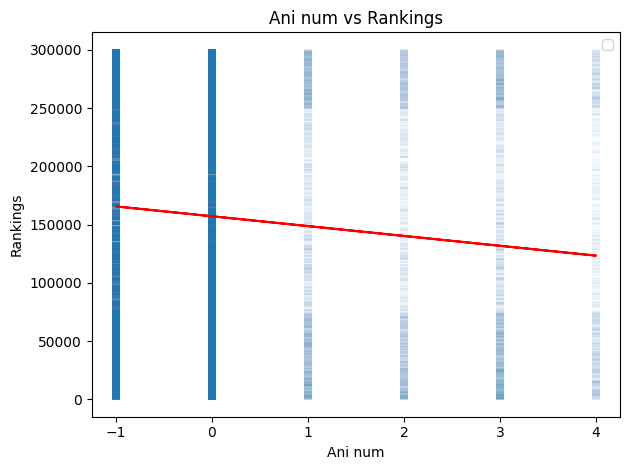

In [32]:
df_modified = df.copy()df_modified.loc[df_modified['ani_num'] == -1, 'ani_num'] = 0x = df_modified['ani_num'].values
y = df_modified['rankings'].values

# 시각화
plt.scatter(x, y, alpha=0.01, marker='_')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')  # 최소제곱선 시각화

plt.title('Ani num vs Rankings')
plt.xlabel('Ani num')
plt.ylabel('Rankings')
plt.legend()
plt.tight_layout()
plt.show()